In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

In [33]:
data=pd.read_csv("sales_data_with_discounts.csv",index_col=0)
data.head()



,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,,,,,,,
01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


Descriptive Analytics for Numerical Columns

In [ ]:
#Identify thenumerical columns
numerical_col=data.select_dtypes(include=['int64','float64']).columns
print("Numerical Columns:",numerical_col)

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [36]:
stats= data[numerical_col].describe().T
stats['mode']=data[numerical_col].mode().iloc[0]
print(stats[['mean','50%','mode','std']].rename(columns={'50%':'median'}))

                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


In [ ]:
#BRIEF INTERPRETATION

# Volume (Units Sold)
# Mean: 5.07 units per transaction.
# Median: 4 units, meaning most transactions involve small volumes.
# Mode: 3 units, the most frequent purchase quantity.
# Std Dev: 4.23, indicating some variation in order sizes.

# Average Price (Per Unit Price)
# Mean: ₹10,453, but the median is only ₹1,450.
# Mode: ₹400, meaning low-priced products are the most common.
# High Std Dev (₹18,079) suggests significant price variation, likely due to expensive and low-cost products being present.

# Total Sales Value (Per Transaction Revenue)
# Mean: ₹33,812 per transaction.
# Median: ₹5,700, showing that most transactions are lower in value, while a few high-value sales increase the mean.
# Mode: ₹24,300, indicating this is a frequent sales value.
# High Std Dev (₹50,535) suggests wide variation in sales values.

# Discount Rate (%)
# Mean: 15.16%, meaning most products get significant discounts.
# Median: 16.58%, close to the mean, indicating a fairly normal distribution.
# Mode: 5%, showing that some products get minimal discounts.
# Low Std Dev (4.22) suggests discount rates are fairly consistent.

# Discount Amount (Total Discount Given)
# Mean: ₹3,346 per transaction.
# Median: ₹988, meaning most discounts are on the lower side, but a few high-discount sales increase the mean.
# Mode: ₹69, showing many small-discount transactions.
# High Std Dev (₹4,509) suggests significant variation in discount amounts.

# Net Sales Value (Final Revenue After Discount)
# Mean: ₹30,466 per transaction, meaning the business makes this amount on average.
# Median: ₹4,678, meaning many transactions generate lower revenue.
# Mode: ₹327, indicating many small transactions.
# High Std Dev (₹46,358) suggests a wide range of sales, from very small to very large transactions.

# Key Insights
# Sales & Pricing Variation: Large differences between mean and median in Avg Price, Sales Value, and Net Sales indicate a mix of high- and low-value transactions.
# Discount Trends: The discount rate is fairly consistent (~15%), but the absolute discount amount varies widely.
# Skewed Distribution: Higher means than medians suggest some extreme high-value transactions are pulling the average up.

Data Visualization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram

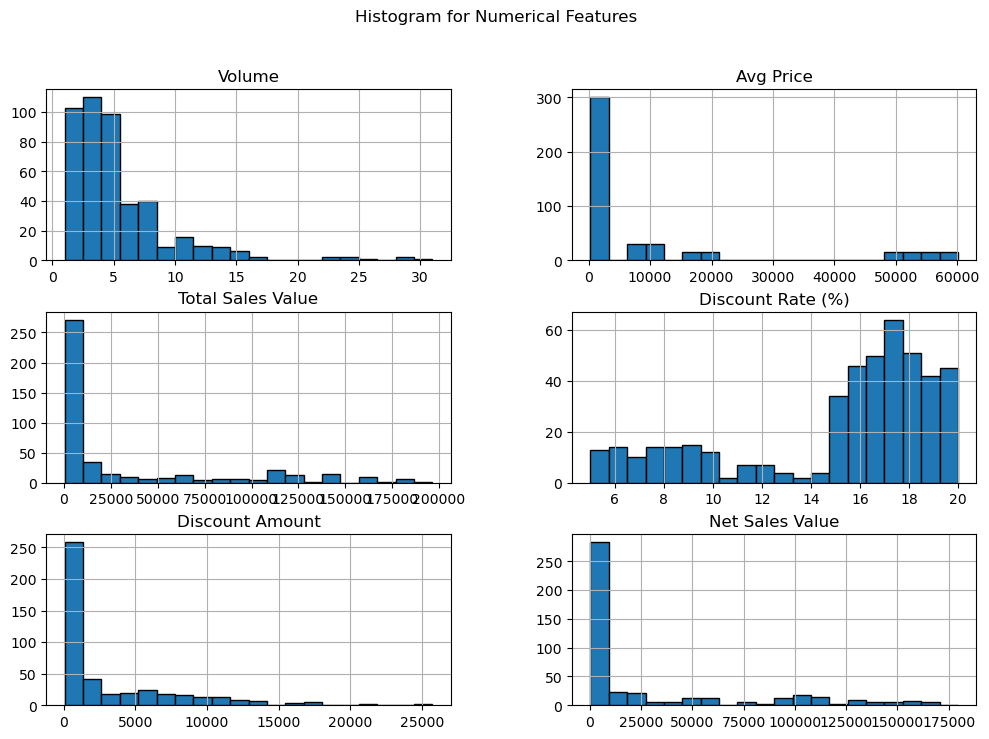

In [40]:
data.hist(figsize=(12,8),bins=20,edgecolor='black')
plt.suptitle("Histogram for Numerical Features")
plt.show()

In [ ]:
#HISTOGRAM INFERENCE

# Right-skewed distributions in Volume, Sales, Discounts, and Net Sales indicate most transactions involve small purchases, with a few high-value ones.
# Avg Price shows distinct clusters, suggesting different product categories (low & high-priced items).
# Discount Rate mostly between 5-20%, showing structured discounting, with peaks around 16-18%.
# Outliers in Sales & Discount Amount indicate some exceptionally high-value transactions affecting overall revenue.

BoxPlot

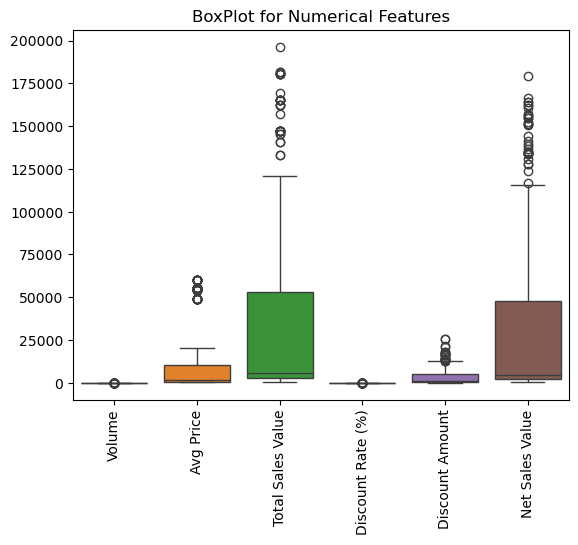

In [41]:
plt.Figure(figsize=(12,6))
sns.boxplot(data.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=90)
plt.title("BoxPlot for Numerical Features")
plt.show()


In [ ]:
#BOXPLOT INTERPRETATION

# Significant outliers in Total Sales Value, Net Sales Value, and Avg Price, indicating high-value transactions.
# Discount Rate (%) has a compact range, suggesting consistent discounting practices.
# Volume and Discount Amount show some outliers, but their spread is relatively smaller.
# Total & Net Sales Values have wide interquartile ranges, showing high variability in sales performance.

Bar Chart

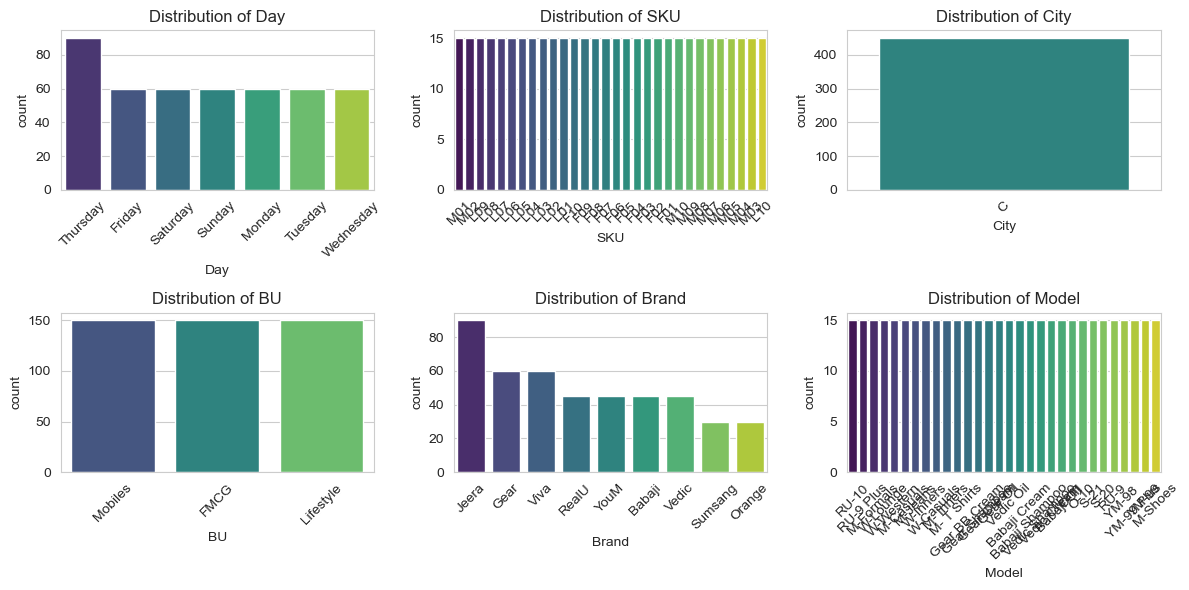

In [48]:
categorical_col=data.select_dtypes(include=['object']).columns
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
for i,col in enumerate(categorical_col,1):
    plt.subplot(2,3,i)
    sns.countplot(data,x=col,order=data[col].value_counts().index,palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [ ]:
#BAR CHART INSIGHT

# Day-wise Distribution:
# Most transactions occurred on Thursday.
# The rest of the days have almost equal distribution.

# City-wise Distribution:
# All transactions happened in a single city (C), suggesting data is location-specific.

# Business Unit (BU) Distribution:
# Sales are evenly distributed across Mobiles, FMCG, and Lifestyle.

# Brand Distribution:
# Jeera is the most popular brand, followed by Gear and Viva.
# Other brands have lower sales.

# SKU & Model-wise Distribution:
# SKU & Models have nearly equal sales, indicating a well-balanced product distribution.

Standardization of Numerical Variables

Concept Of Z-score normalization

Z= (X−μ)/σ

where:
X = original value
μ = mean of the variable
σ = standard deviation
This transformation scales all numerical columns to a common range without affecting the relationships between values.

<Figure size 1200x800 with 0 Axes>

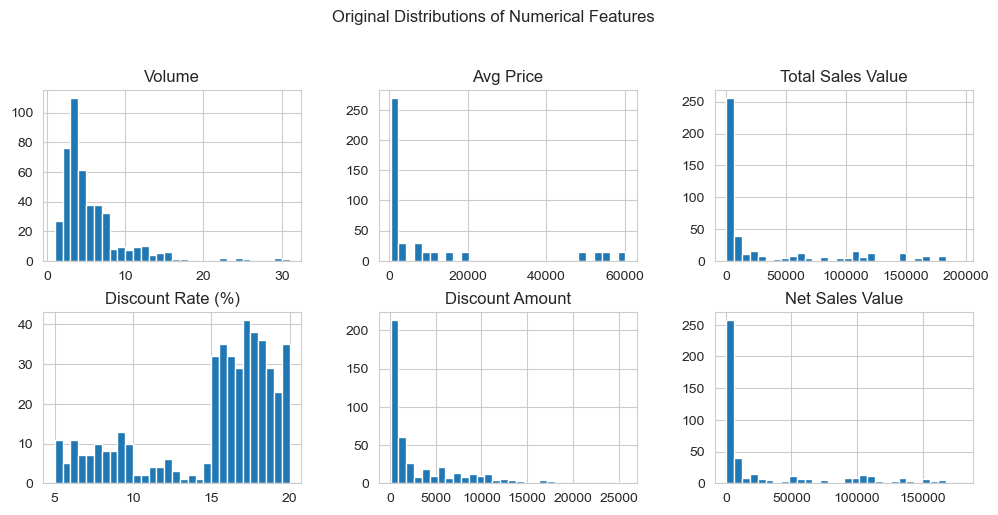

In [45]:
plt.figure(figsize=(12,8))
data[numerical_col].hist(bins=30,figsize=(12,8),layout=(3,3))
plt.suptitle("Original Distributions of Numerical Features")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_standardtize=data.copy()
data_standardtize[numerical_col]= scaler.fit_transform(data[numerical_col])

print(data_standardtize.head())

                 Day  SKU City    Volume       BU  Brand       Model  \
Date                                                                   
01-04-2021  Thursday  M01    C  2.350029  Mobiles  RealU       RU-10   
01-04-2021  Thursday  M02    C  1.167129  Mobiles  RealU   RU-9 Plus   
01-04-2021  Thursday  M03    C  0.457388  Mobiles   YouM       YM-99   
01-04-2021  Thursday  M04    C  0.220808  Mobiles   YouM  YM-99 Plus   
01-04-2021  Thursday  M05    C -0.488932  Mobiles   YouM      YM-98    

            Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
Date                                                                           
01-04-2021   0.091173           2.925721          -0.830289         3.952816   
01-04-2021  -0.019570           1.330995          -0.852661         1.849014   
01-04-2021   0.312659           1.562775          -1.351631         1.622995   
01-04-2021   0.534146           1.719276          -1.949723         1.113807   
01-04-2021  -0.

<Figure size 1200x800 with 0 Axes>

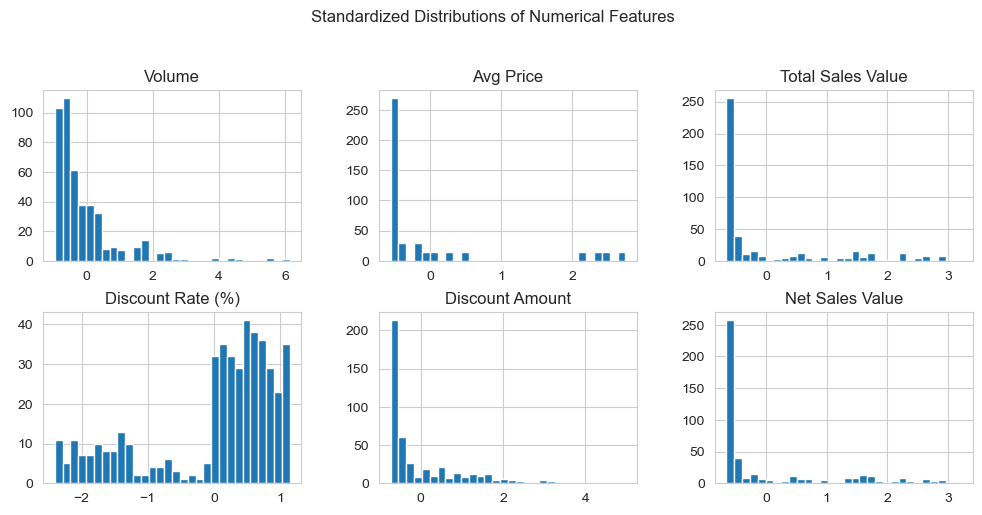

In [44]:
plt.figure(figsize=(12,8))
data_standardtize[numerical_col].hist(bins=30,figsize=(12,8),layout=(3,3))
plt.suptitle("Standardized Distributions of Numerical Features")
plt.show()

Conversion of Categorical Data into Dummy Variables

Why Convert Categorical Data into Dummy Variables?

Many machine learning algorithms cannot work directly with categorical data because they require numerical input. Converting categorical variables into dummy variables (one-hot encoding) ensures that models can interpret and process the data correctly.

Key Reasons for One-Hot Encoding:
1. Machine Learning Compatibility: Algorithms like linear regression, decision trees, and neural networks require numerical data.
2. Avoiding Ordinal Assumptions: One-hot encoding prevents the model from assuming a natural order between categorical values (e.g., "Apple" is not greater than "Orange").
3. Better Model Performance: Some algorithms perform poorly with raw categorical data but improve when categorical variables are converted into numerical features.

In [54]:
data_encoded=pd.get_dummies(data, columns=categorical_col,dtype=int)

print("Original Shape:",data.shape)
print("Transformed shape:",data_encoded.shape)

Original Shape: (450, 12)
Transformed shape: (450, 86)


In [55]:
data_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
Date,,,,,,,,,,,,,,,,,,,,,
01-04-2021,15,12100,181500,11.654820,21153.498820,160346.50120,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01-04-2021,10,10100,101000,11.560498,11676.102960,89323.89704,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01-04-2021,7,16100,112700,9.456886,10657.910160,102042.08980,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01-04-2021,6,20100,120600,6.935385,8364.074702,112235.92530,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
01-04-2021,3,8100,24300,17.995663,4372.946230,19927.05377,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Conclusion
Key Findings from Descriptive Analytics & Visualizations:
1. Categorical Data Insights:
    * The distribution of sales across days shows Thursday had the highest sales compared to other days.
    * Brand "Jeera" dominated the market, while other brands had relatively lower frequencies.
    * ity and SKU distributions are uniform, suggesting no specific SKU or city had a significant skew in the data.

2. Numerical Data Insights (Box Plot Analysis): 
    * Total Sales Value and Net Sales Value have high variability, with many outliers indicating some transactions are significantly larger.
    * Discount Rate and Discount Amount have low median values but a few extreme discount cases.

3. Importance of Data Preprocessing (Standardization & One-Hot Encoding):

    * Standardization (Z-score normalization) ensures numerical data is scaled uniformly, preventing bias in machine learning models that are sensitive to different scales.
    * One-Hot Encoding converts categorical data into numerical format, making it suitable for analysis and ensuring algorithms interpret categories correctly.

Final Thoughts:
Data preprocessing is crucial for improving accuracy, efficiency, and interpretability in data analysis and machine learning. Without these steps, models may misinterpret features, leading to poor predictions. Proper visualization helps in understanding trends and identifying data issues early.